## Extract the data from the csv

In [9]:
import numpy as np
from sklearn import preprocessing
import numpy as np
import tensorflow as tf

# Load the data
from google.colab import drive
drive.mount('/content/drive')
raw_csv_data = np.loadtxt('/content/drive/MyDrive/Data science-BootCamp/5. Deep-learning/data/Audiobooks_data.csv',delimiter=',')

unscaled_inputs_all = raw_csv_data[:,1:-1]
# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = raw_csv_data[:,-1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_csv_data

array([[9.9400e+02, 1.6200e+03, 1.6200e+03, ..., 5.0000e+00, 9.2000e+01,
        0.0000e+00],
       [1.1430e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0590e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 3.8800e+02,
        0.0000e+00],
       ...,
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00],
       [2.5100e+02, 1.6740e+03, 3.3480e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

## Balance the dataset

In [ ]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

## Standardize the inputs

In [ ]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

## Shuffle the data

In [ ]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

## Split the dataset into train, validation, and test

In [ ]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1784.0 3579 0.4984632578932663
232.0 447 0.5190156599552572
221.0 448 0.49330357142857145


## Save the three datasets in *.npz

In [ ]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

## Loading data

In [10]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('Audiobooks_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.int)

# we load the validation data in the temporary variable
npz = np.load('Audiobooks_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# we load the test data in the temporary variable
npz = np.load('Audiobooks_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

## Model

In [22]:
# Set the input and output sizes
input_size = 10
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          # callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/100
36/36 - 0s - loss: 0.6641 - accuracy: 0.5963 - val_loss: 0.6329 - val_accuracy: 0.6130
Epoch 2/100
36/36 - 0s - loss: 0.6076 - accuracy: 0.6547 - val_loss: 0.5916 - val_accuracy: 0.6868
Epoch 3/100
36/36 - 0s - loss: 0.5737 - accuracy: 0.6792 - val_loss: 0.5574 - val_accuracy: 0.7002
Epoch 4/100
36/36 - 0s - loss: 0.5452 - accuracy: 0.6980 - val_loss: 0.5281 - val_accuracy: 0.7181
Epoch 5/100
36/36 - 0s - loss: 0.5213 - accuracy: 0.7178 - val_loss: 0.5041 - val_accuracy: 0.7338
Epoch 6/100
36/36 - 0s - loss: 0.5013 - accuracy: 0.7393 - val_loss: 0.4841 - val_accuracy: 0.7740
Epoch 7/100
36/36 - 0s - loss: 0.4846 - accuracy: 0.7494 - val_loss: 0.4674 - val_accuracy: 0.7785
Epoch 8/100
36/36 - 0s - loss: 0.4707 - accuracy: 0.7566 - val_loss: 0.4535 - val_accuracy: 0.7852
Epoch 9/100
36/36 - 0s - loss: 0.4591 - accuracy: 0.7631 - val_loss: 0.4410 - val_accuracy: 0.7897
Epoch 10/100
36/36 - 0s - loss: 0.4493 - accuracy: 0.7653 - val_loss: 0.4306 - val_accuracy: 0.7919
Epoch 11/

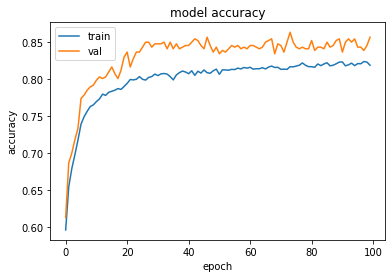

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

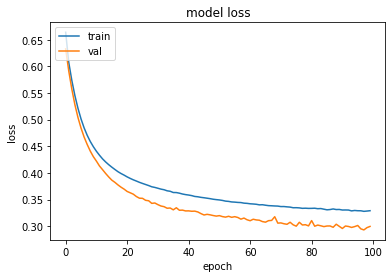

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Test the model

In [25]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

14/14 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8192
Test loss: 0.34. Test accuracy: 81.92%
